# Exploring the MovieLens 1M Dataset

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [141]:
import pandas as pd

Next we will import each of the three tables and assign names to each of the columns:

In [142]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python', encoding='ISO-8859-1')


Let's take a look at the first 5 rows of each table:

In [143]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [144]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [145]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Having all information spread across different tables makes it much more dificult to analyse the data. Using pandas's merge function, we first merge ratings with users then we merge that result with the movies data. pandas infers which columns to
use as the merge (or join) keys based on overlapping names:

In [146]:
data = pd.merge(pd.merge(ratings, users), movies)

Below is the first row in that dataset

In [147]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:


In [148]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [149]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


If we wish to only look at movies that received more than a certain number of ratings, we can group them as follows (here using 250 ratings):

In [150]:
ratings_by_title = data.groupby('title').size()

In [151]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

Let's now grab the titles of movies that were rated more than 250 times:

In [152]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [153]:
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:


In [154]:
mean_ratings = mean_ratings.loc[active_titles]

In [155]:
mean_ratings[:5]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


To see the top films among female viewers, we can sort by the F column in descending order:

In [156]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [157]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


Likewise, for males:

In [158]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [159]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [160]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [161]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [162]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [163]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [164]:
# 1 The mean of movie ratings by men of age above 25 for each particular genre, e.g., Action, Adventure, Drama, Science Fiction, ... Note, Action|Drama|Thriller is not considered a unique genre. The movie that has a genre like this belongs to all three genres.

# Filter male users above 25
users_M25 = users[(users['gender'] == 'M') & (users['age'] > 25)]

# Merge with ratings and movies
merged_data_M25 = pd.merge(pd.merge(users_M25, ratings, on='user_id'), movies, on='movie_id')

# Split genres
genres_data = merged_data_M25.assign(genres=merged_data_M25['genres'].str.split('|')).explode('genres')

# Mean ratings by genre
mean_ratings_by_genre = genres_data.groupby('genres')['rating'].mean()
print("Mean Ratings by Genre for Male Users Above 25:")
print(mean_ratings_by_genre)

Mean Ratings by Genre for Male Users Above 25:
genres
Action         3.554547
Adventure      3.538637
Animation      3.721569
Children's     3.475314
Comedy         3.565456
Crime          3.764249
Documentary    3.950192
Drama          3.812309
Fantasy        3.490408
Film-Noir      4.117140
Horror         3.241089
Musical        3.700242
Mystery        3.759347
Romance        3.659748
Sci-Fi         3.509693
Thriller       3.644025
War            3.940634
Western        3.708494
Name: rating, dtype: float64


In [165]:
# 2 The top 5 ranked movies by the most number of ratings (not the highest rating)

# Top 5 ranked movies by the number of ratings
top_movies = ratings.groupby("movie_id").size().reset_index(name="Rating Count")
top_movies = top_movies.merge(movies, on="movie_id").sort_values(by="Rating Count", ascending=False)

# Select top 5
top_5_movies = top_movies.head(5)[["movie_id", "title", "Rating Count"]]

# Display results
print(top_5_movies)


      movie_id                                              title  \
2651      2858                             American Beauty (1999)   
253        260          Star Wars: Episode IV - A New Hope (1977)   
1106      1196  Star Wars: Episode V - The Empire Strikes Back...   
1120      1210  Star Wars: Episode VI - Return of the Jedi (1983)   
466        480                               Jurassic Park (1993)   

      Rating Count  
2651          3428  
253           2991  
1106          2990  
1120          2883  
466           2672  


In [166]:
# 3 Average movie ratings between users of different age groups (<=18, 19-30, 31-50, 51-70, >=71
# Define age groups
bins = [0, 18, 30, 50, 70, 100]
labels = ['<=18', '19-30', '31-50', '51-70', '>=71']
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels)

# Merge and calculate average ratings by age groups
age_group_ratings = pd.merge(users, ratings, on='user_id')
avg_ratings_by_age_group = age_group_ratings.groupby('age_group',observed=False)['rating'].mean()
print("Average Ratings by Age Group:\n")
print(avg_ratings_by_age_group)

Average Ratings by Age Group:

age_group
<=18     3.512990
19-30    3.545235
31-50    3.642516
51-70    3.766632
>=71          NaN
Name: rating, dtype: float64


In [167]:
# 4 Pick a movie of your choice and for all movies of the same year, provide a breakdown of the number of unique movies rated by 3 ranges of age of reviewers (a) under 18 (b) 19 to 45 (c) Above 45

# Pick a movie and its year
picked_movie = 'Final Destination (2000)'

picked_year = movies[movies['title'] == picked_movie]['title'].str.extract(r'\((\d{4})\)').iloc[0, 0]

print('Picked Movie:', picked_movie, ' Year:', picked_year)

# Filter movies with the same year
same_year_movies = movies[movies['title'].str.contains(f'\\({picked_year}\\)')]

# Merge with ratings and users, segment by age ranges
merged_data = pd.merge(pd.merge(ratings, users, on='user_id'), same_year_movies, on='movie_id')
merged_data['age_range'] = pd.cut(merged_data['age'], bins=[0, 18, 45, 100], labels=['<=18', '19-45', '>45'])

# Count unique movies rated by age ranges
unique_movies_count = merged_data.groupby('age_range',observed=False)['movie_id'].nunique()
print("Number of unique movies rated by age ranges for 2000 movies:\n")
print(unique_movies_count)

Picked Movie: Final Destination (2000)  Year: 2000
Number of unique movies rated by age ranges for 2000 movies:

age_range
<=18     145
19-45    147
>45      131
Name: movie_id, dtype: int64


In [168]:
#5 A function that takes in a user_id and a movie_id, and returns a list of all the other movies that the user rated similarly to the given movie, i.e. with the same rating. Demonstrate that your function works.

def find_similar_rated_movies(user_id, movie_id):
    # Get all ratings by the user
    user_ratings = ratings[ratings['user_id'] == user_id]
    
    # Check if the movie exists in the user's ratings
    target_rating = user_ratings.loc[user_ratings['movie_id'] == movie_id, 'rating']
    if target_rating.empty:
        return f"User {user_id} has not rated movie {movie_id}."
    
    target_rating = target_rating.iloc[0]
    
    # Find all movies with the same rating, excluding the original movie
    similar_movies = user_ratings[(user_ratings['rating'] == target_rating) & (user_ratings['movie_id'] != movie_id)]
    
    # Merge with movies dataset to get titles
    return pd.merge(similar_movies, movies, on='movie_id')['title'].tolist()

# Test
test_result = find_similar_rated_movies(user_id=1, movie_id=1)

# Display the results
print(test_result)


["One Flew Over the Cuckoo's Nest (1975)", "Bug's Life, A (1998)", 'Ben-Hur (1959)', 'Christmas Story, A (1983)', 'Beauty and the Beast (1991)', 'Sound of Music, The (1965)', 'Awakenings (1990)', 'Back to the Future (1985)', "Schindler's List (1993)", 'Pocahontas (1995)', 'Last Days of Disco, The (1998)', 'Cinderella (1950)', 'Apollo 13 (1995)', 'Rain Man (1988)', 'Mary Poppins (1964)', 'Dumbo (1941)', 'Saving Private Ryan (1998)']


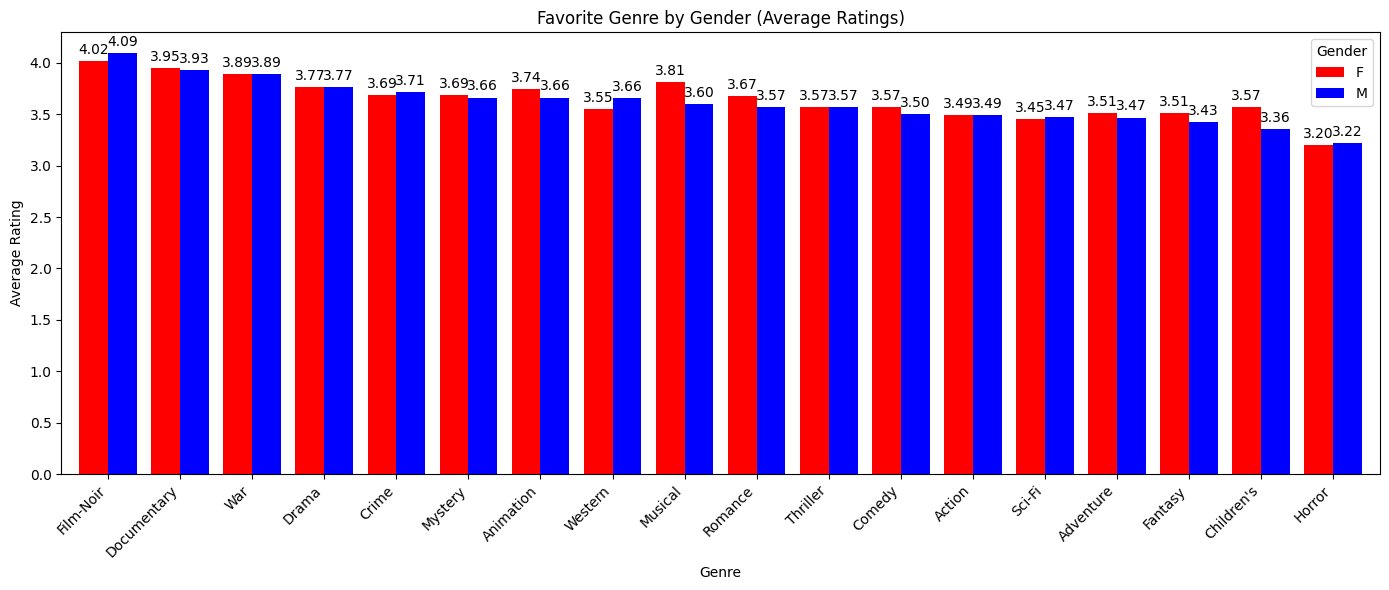

Favorite Genre by Gender (Average Ratings):
 gender              F         M
genres                         
Film-Noir    4.018087  4.092254
Documentary  3.946392  3.928811
War          3.893138  3.893375
Drama        3.765662  3.766589
Crime        3.689332  3.713720
Mystery      3.686548  3.662009
Animation    3.744702  3.661335
Western      3.551913  3.655120
Musical      3.809108  3.596332
Romance      3.673579  3.573262
Thriller     3.573360  3.569685
Comedy       3.571938  3.503667
Action       3.490252  3.491386
Sci-Fi       3.450255  3.469952
Adventure    3.512879  3.468125
Fantasy      3.513076  3.426603
Children's   3.572548  3.358961
Horror       3.202870  3.217891


In [169]:
#6  [20 pts] Some other statistic, figure, aggregate, or plot that you created using this dataset, along with a short description of what interesting observations you derived from it.

import matplotlib.pyplot as plt

# Merge all data
merged_data = ratings.merge(users, on='user_id').merge(movies, on='movie_id')

# Split multi-genres into separate rows
genres_data = merged_data.assign(genres=merged_data['genres'].str.split('|')).explode('genres')

# Group by genres and gender to calculate mean ratings
genre_gender_ratings = genres_data.groupby(['genres', 'gender'])['rating'].mean().reset_index()

# Pivot data for plotting
pivot_data = genre_gender_ratings.pivot(index='genres', columns='gender', values='rating')

# Sort genres by highest average rating
pivot_data = pivot_data.sort_values(by=['M', 'F'], ascending=False)

# Plot
custom_colors = {'F': 'red', 'M': 'blue'}

fig, ax = plt.subplots(figsize=(14, 6))
pivot_data.plot(kind='bar', ax=ax, width=0.8, color=[custom_colors[col] for col in pivot_data.columns])

plt.title('Favorite Genre by Gender (Average Ratings)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Gender')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, padding=3)

plt.tight_layout()

plt.show()
print("Favorite Genre by Gender (Average Ratings):\n", pivot_data)



In [170]:
# Compute the absolute difference in ratings between genders for each genre
pivot_data['Gender Gap'] = abs(pivot_data['M'] - pivot_data['F'])

# Sort genres by the largest gender gap
gender_gap_df = pivot_data[['Gender Gap']].sort_values(by='Gender Gap', ascending=False).reset_index()

print (gender_gap_df)


gender       genres  Gender Gap
0        Children's    0.213586
1           Musical    0.212775
2           Western    0.103208
3           Romance    0.100317
4           Fantasy    0.086473
5         Animation    0.083367
6         Film-Noir    0.074167
7            Comedy    0.068271
8         Adventure    0.044753
9           Mystery    0.024539
10            Crime    0.024388
11           Sci-Fi    0.019697
12      Documentary    0.017581
13           Horror    0.015021
14         Thriller    0.003675
15           Action    0.001134
16            Drama    0.000927
17              War    0.000237


The genre with the greatest gender gap in ratings is Children’s movies, with female users rating them significantly higher than male users. Musicals also show a notable gap, with females favoring them more. Western and Romance genres follow, reinforcing the common assumption that certain genres appeal differently based on gender. On the other hand, Action, Drama, and Thriller have almost no gender disparity, suggesting that both male and female viewers rate these genres similarly, indicating a more universally appreciated genre across genders. This insight could help streaming platforms tailor recommendations based on gender-based preferences.